# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#scikit-learn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

#imbalance handling
from imblearn.over_sampling import SMOTE

from pandas.plotting import scatter_matrix
from seaborn import pairplot

In [2]:
df= pd.read_csv('/home/hf180/CO7093_Lab/Dataset.csv', low_memory = False)

In [3]:
df.shape #checking the shape of the dataframe

(200031, 22)

In [4]:
df.head(10) #analysing dataframe by checking first 10 rows

,index,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,2,1,2,2,09/06/2020,1,2,55,?,...,2,2,2,2,2,2,2,2,3,2.0
1,5,2,1,1,2,9999-99-99,2,1,40,2,...,2,2,2,2,2,2,2,2,3,2.0
2,8,2,1,1,2,9999-99-99,2,2,37,2,...,2,2,1,2,2,1,2,2,3,2.0
3,9,2,1,1,2,9999-99-99,2,2,25,2,...,2,2,2,2,2,2,2,2,3,2.0
4,11,2,1,2,2,9999-99-99,2,2,24,?,...,2,2,2,2,2,2,2,2,3,2.0
5,12,2,1,2,2,9999-99-99,2,2,30,?,...,2,2,2,2,2,2,2,2,3,2.0
6,16,2,1,1,2,9999-99-99,2,1,80,2,...,2,2,1,2,2,2,2,2,3,1.0
7,20,2,1,2,2,9999-99-99,2,1,59,?,...,2,2,2,2,2,2,2,1,3,1.0
8,30,2,1,2,2,9999-99-99,2,1,45,?,...,2,2,2,2,2,2,2,2,3,2.0
9,41,2,1,2,2,9999-99-99,1,1,45,?,...,2,2,2,2,2,2,2,2,3,1.0


In [5]:
df.isnull().sum()

index                   0
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
df.replace("?", np.nan, inplace=True) #replacing ? with NaN

In [7]:
df.isnull().sum() #checking if ? have been replaced with NaN

index                        0
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                   7325
PNEUMONIA                 5144
AGE                          0
PREGNANT                118792
DIABETES                  1195
COPD                      1064
ASTHMA                    1066
INMSUPR                   1280
HIPERTENSION              1106
OTHER_DISEASE             2074
CARDIOVASCULAR            1143
OBESITY                   1113
RENAL_CHRONIC             1074
TOBACCO                   1126
CLASIFFICATION_FINAL         0
ICU                       7488
dtype: int64

In [8]:
df.dtypes #checking datatypes of features

index                    int64
USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                 object
PNEUMONIA               object
AGE                      int64
PREGNANT                object
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HIPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL     int64
ICU                     object
dtype: object

In [9]:
df.drop(columns=['index','USMER','MEDICAL_UNIT','PATIENT_TYPE','DATE_DIED','PREGNANT'],inplace=True)
#dropping irrelevant columns

In [10]:
df= df.dropna() #dropping all rows with NaN values

In [11]:
df.shape #rechecking shape

(189586, 16)

In [12]:
cols = ['INTUBED','PNEUMONIA','ASTHMA','DIABETES','COPD','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','ICU']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce').astype("Int64") #8 bytes of memory
#changing datatypes of other columns to match
#Reference - https://stackoverflow.com/questions/9696660/what-is-the-difference-between-int-int16-int32-and-int64

In [13]:
df.dtypes #checking if changes are reflected

SEX                     int64
INTUBED                 Int64
PNEUMONIA               Int64
AGE                     int64
DIABETES                Int64
COPD                    Int64
ASTHMA                  Int64
INMSUPR                 Int64
HIPERTENSION            Int64
OTHER_DISEASE           Int64
CARDIOVASCULAR          Int64
OBESITY                 Int64
RENAL_CHRONIC           Int64
TOBACCO                 Int64
CLASIFFICATION_FINAL    int64
ICU                     Int64
dtype: object

In [14]:
df.head(10)

,SEX,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,2,55,1,2,2,2,2,2,2,2,2,2,3,2
1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,3,2
2,1,2,2,37,1,2,2,2,1,2,2,1,2,2,3,2
3,1,2,2,25,2,2,2,2,2,2,2,2,2,2,3,2
4,2,2,2,24,2,2,2,2,2,2,2,2,2,2,3,2
5,2,2,2,30,2,2,2,2,2,2,2,2,2,2,3,2
6,1,2,1,80,2,2,2,2,1,2,2,2,2,2,3,1
7,2,2,1,59,1,2,2,2,2,2,2,2,2,1,3,1
8,2,2,1,45,2,2,2,2,2,2,2,2,2,2,3,2
9,2,1,1,45,2,2,2,2,2,2,2,2,2,2,3,1


## Outliers

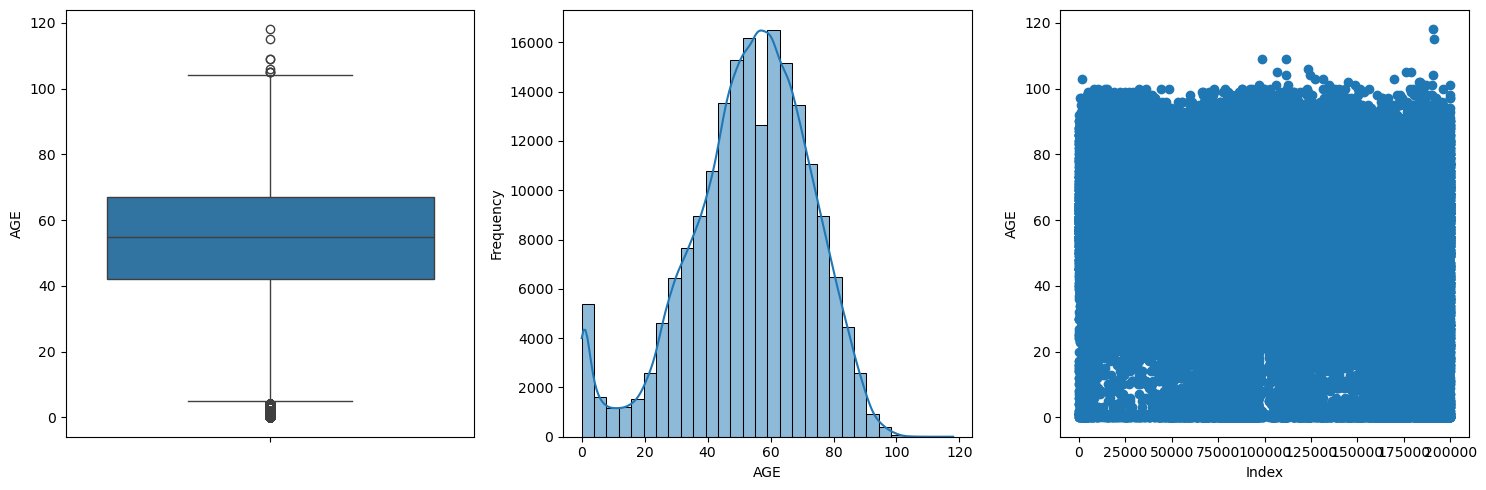

In [15]:
#visualising outliers using plots
plt.figure(figsize=(15,5))
#choosing 'AGE' column as remaining columns are binary (1s and 2s), and therefore would have no outliers

#boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=df["AGE"])
plt.ylabel("AGE")

#histogram
plt.subplot(1, 3, 2)
sns.histplot(df["AGE"], bins=30, kde=True)
plt.xlabel("AGE")
plt.ylabel("Frequency")

#scatterplot
plt.subplot(1, 3, 3)
plt.scatter(df.index, df["AGE"])
plt.xlabel("Index")
plt.ylabel("AGE")

plt.tight_layout()
plt.show()

In [16]:
#Z-score method - did not use

#z_scores = np.abs(stats.zscore(df["AGE"]))
#computing z-score for 'AGE' column

#outliers_z = df[z_scores > 2]

#printing outlier rows detected in AGE using Z-score
#print(outliers_z)

#Remove outliers (AGE with Z-score > threshold)
#df_cleaned_z = df[z_scores <= 2]

# Check the cleaned dataset shape
#print(f"Original data shape: {df.shape}")
#print(f"Cleaned data shape: {df_cleaned_z.shape}")

#with threshold = 2
#Original data shape: (189586, 16)
#Cleaned data shape: (179461, 16)

#with threshold = 3
#Original data shape: (189586, 16)
#Cleaned data shape: (189584, 16)

In [17]:
#Inter-quartile range method

#calculating IQR
Q1 = df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3 - Q1

#identifying outliers
outliers_iqr = df[(df["AGE"] < (Q1 - 1.5 * IQR)) | (df["AGE"] > (Q3 + 1.5 * IQR))]

#printing outliers that were detected
print(outliers_iqr[["AGE"]].values)

#Remove outliers
df_cleaned = df[~((df["AGE"] < (Q1 - 1.5 * IQR)) | (df["AGE"] > (Q3 + 1.5 * IQR)))]

# Check the cleaned dataset shape
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

[[0]
 [2]
 [1]
 ...
 [3]
 [2]
 [3]]
Original data shape: (189586, 16)
Cleaned data shape: (183673, 16)


## Scaling/ Normalisation

In [18]:
#apply Min-Max scaling
df_cleaned.loc[:, 'AGE'] = MinMaxScaler().fit_transform(df_cleaned[['AGE']])

#Reference - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

/tmp/ipykernel_184147/795699926.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.50505051 0.35353535 0.32323232 ... 0.18181818 0.51515152 0.46464646]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, 'AGE'] = MinMaxScaler().fit_transform(df_cleaned[['AGE']])


In [19]:
df_cleaned.shape

(183673, 16)

In [20]:
df_cleaned['ICU'].value_counts(normalize=True) #checking imbalance for traget variable

ICU
2    0.916428
1    0.083572
Name: proportion, dtype: Float64

# Visualisation

#### Class Distribution of target variable

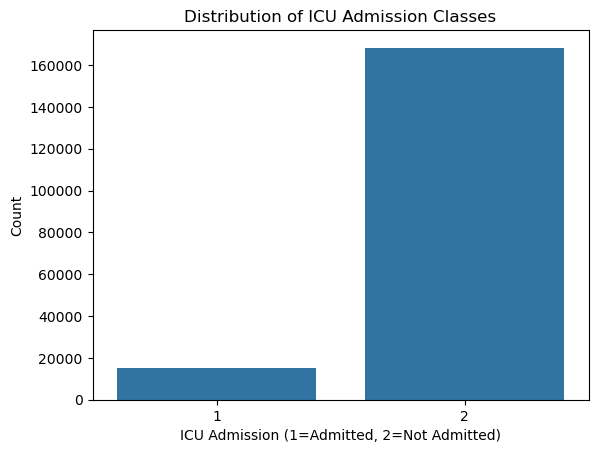

In [21]:
sns.countplot(x='ICU', data=df_cleaned)
plt.title("Distribution of ICU Admission Classes")
plt.xlabel("ICU Admission (1=Admitted, 2=Not Admitted)")
plt.ylabel("Count")
plt.show()

#### Number of ICU cases vs. Age

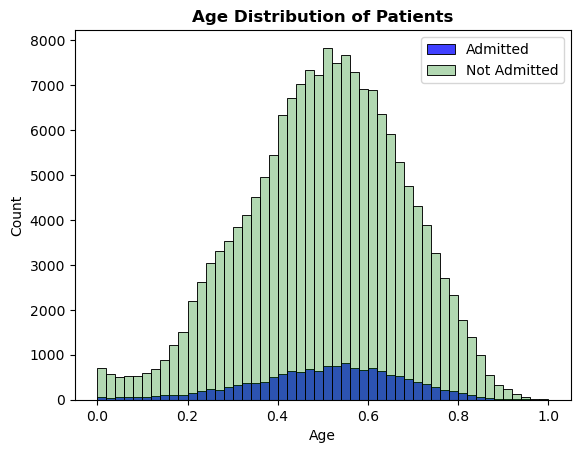

In [22]:
sns.histplot(df_cleaned[df_cleaned["ICU"] == 1]["AGE"], bins = 50, color="blue", label="Admitted")
sns.histplot(df_cleaned[df_cleaned["ICU"] == 2]["AGE"], bins = 50, color="green",alpha=0.3, label="Not Admitted")
plt.title("Age Distribution of Patients", fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

#### ICU vs. CLASSIFICATION_FINAL

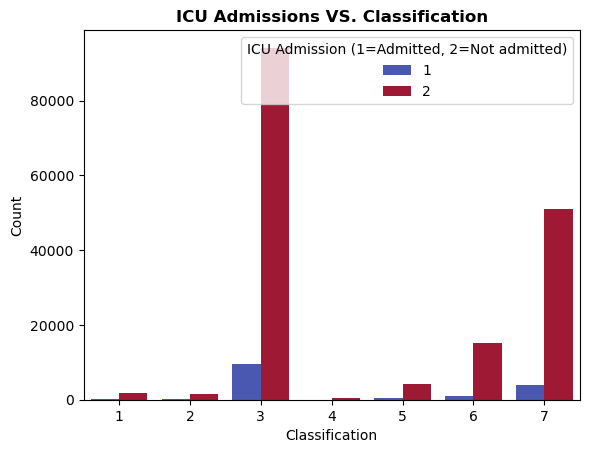

In [23]:
sns.countplot(x='CLASIFFICATION_FINAL', hue='ICU', data=df_cleaned, palette='coolwarm')
plt.title("ICU Admissions VS. Classification", fontweight='bold')
plt.xlabel("Classification")
plt.ylabel("Count")
plt.legend(title="ICU Admission (1=Admitted, 2=Not admitted)")
plt.show()

#### Correlation Matrix Heatmap

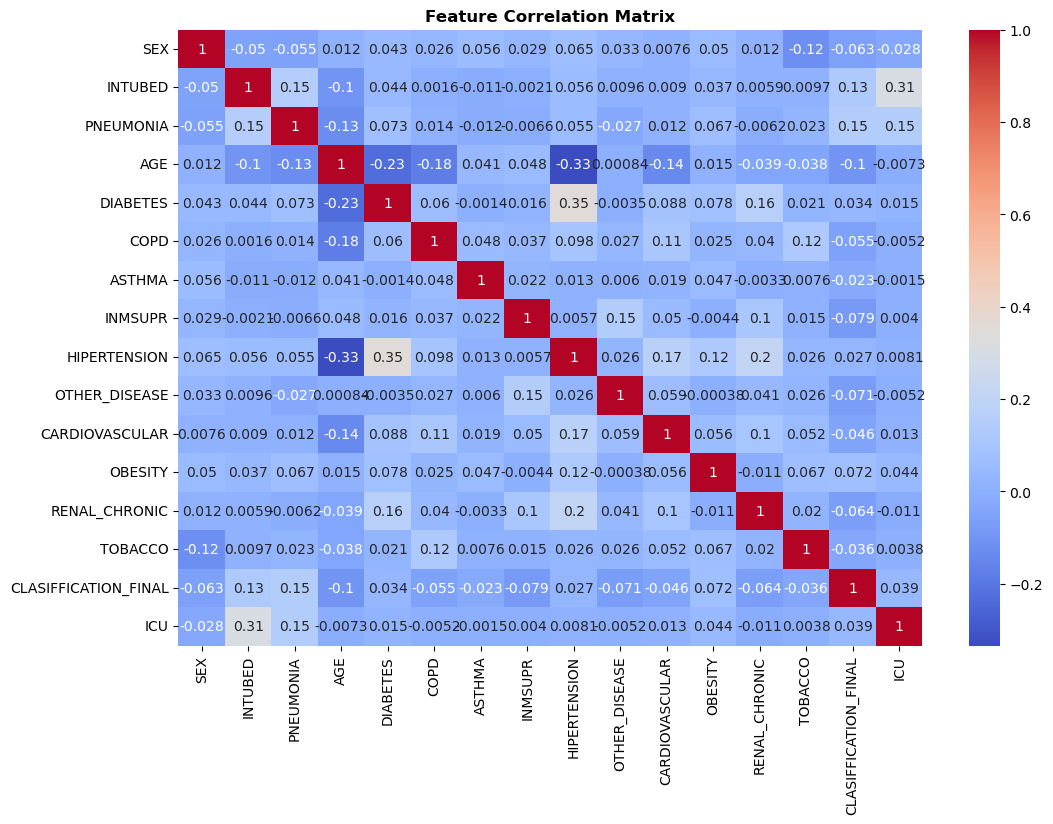

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), cmap="coolwarm", annot = True)
plt.title("Feature Correlation Matrix", fontweight='bold')
plt.show()

#### Scatter matrix

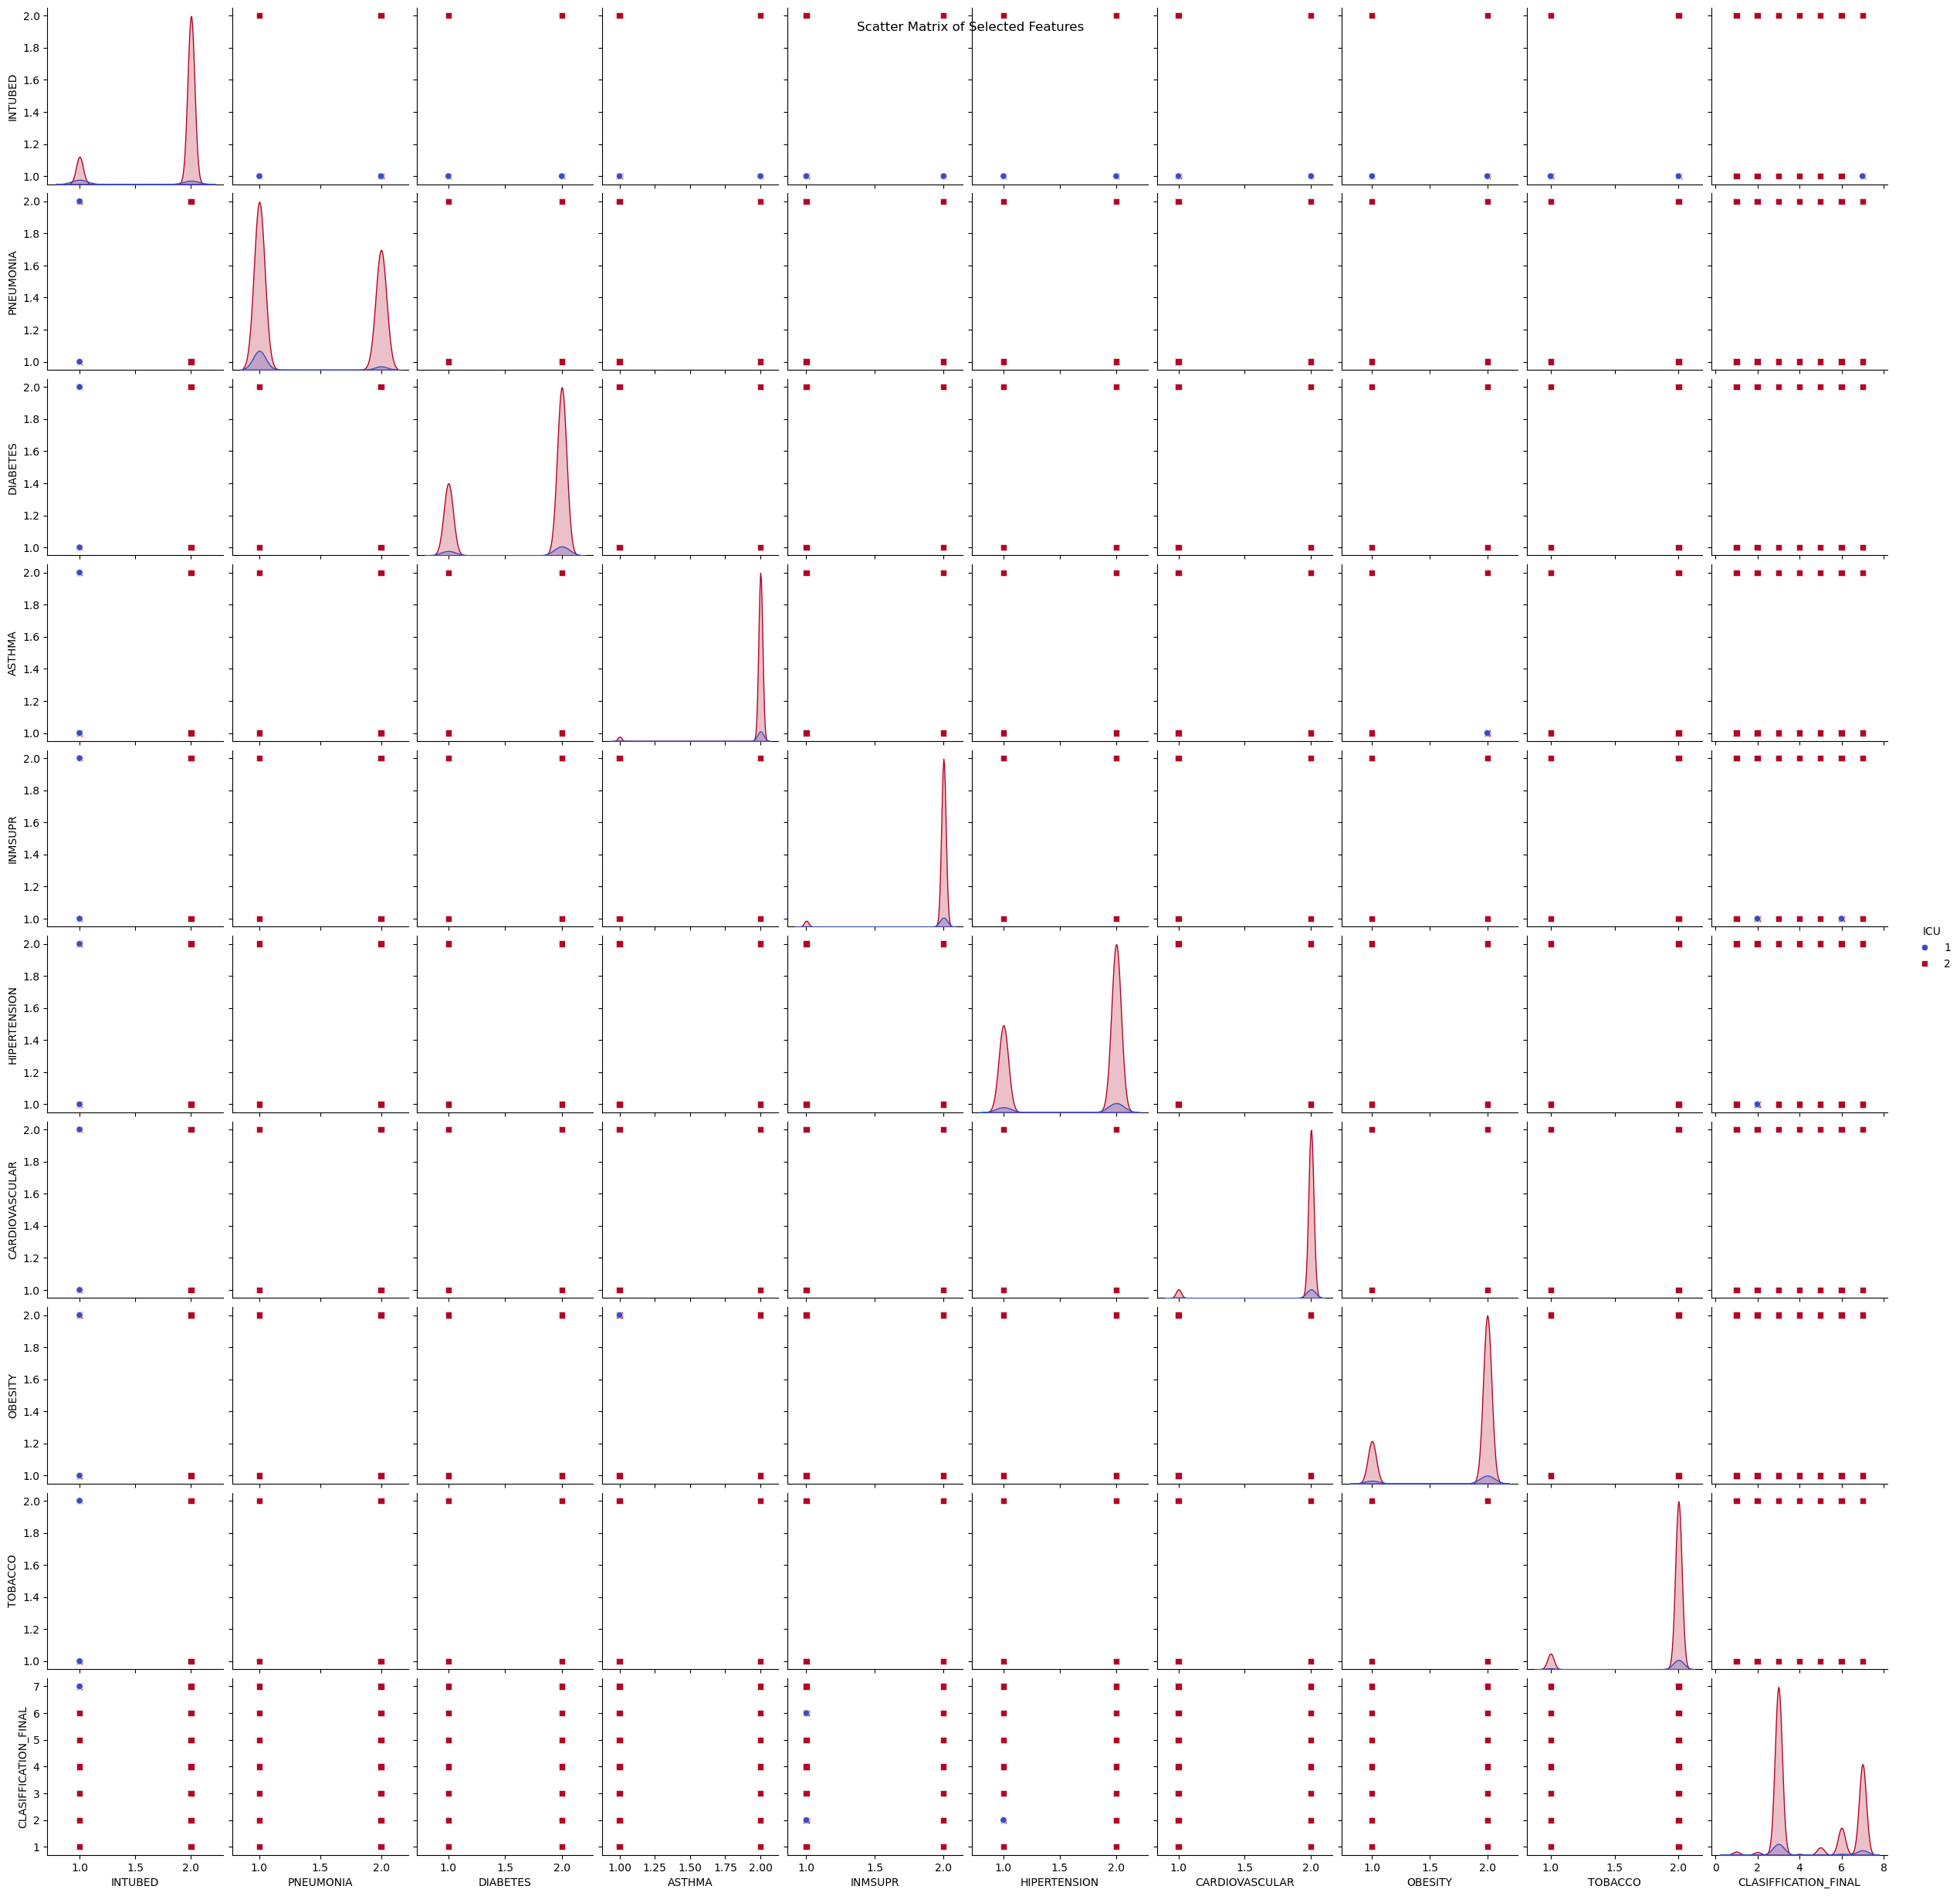

In [25]:
#selecting features
feat = df_cleaned[['INTUBED', 'PNEUMONIA', 'DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']]

#scatter matrix with hue based on ICU admission
sns.pairplot(feat, hue='ICU', palette='coolwarm', markers=["o", "s"])
plt.suptitle("Scatter Matrix of Selected Features")
plt.show()

#### Target variable VS other features

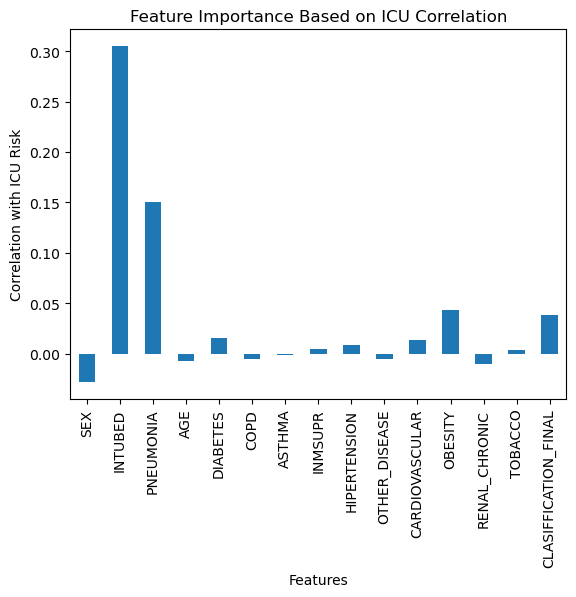

In [26]:
corr_matrix = df_cleaned.corr() 
icu_correlation = df_cleaned.corr()['ICU'].drop('ICU') #correlation between ICU and other features
icu_correlation.plot(kind='bar') 
plt.title("Feature Importance Based on ICU Correlation") 
plt.xlabel("Features") 
plt.ylabel("Correlation with ICU Risk") 
plt.show() 

#### ICU risk based on Pneumonia and Intubation

/tmp/ipykernel_184147/1599108194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['INTUBED_LABEL'] = df_cleaned['INTUBED'].map({1: 'Intubated', 2: 'Not Intubated'})
/tmp/ipykernel_184147/1599108194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PNEUMONIA_LABEL'] = df_cleaned['PNEUMONIA'].map({1: 'Has Pneumonia', 2: 'No Pneumonia'})


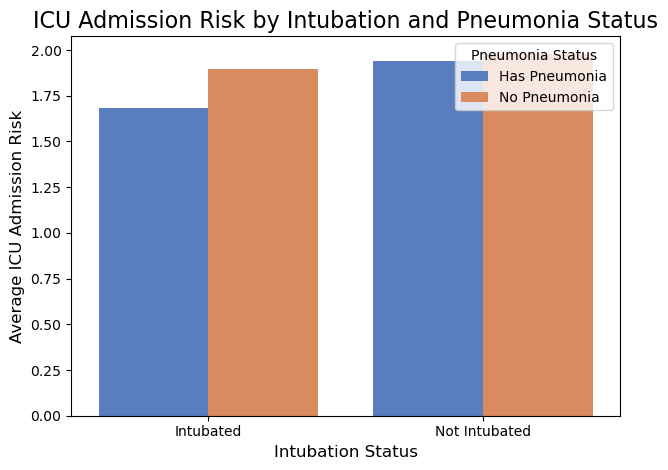

In [27]:
#Map labels for 'INTUBED' (1 = Intubated, 2 = Not Intubated)
df_cleaned['INTUBED_LABEL'] = df_cleaned['INTUBED'].map({1: 'Intubated', 2: 'Not Intubated'})

# Map labels for 'PNEUMONIA' (1 = Has Pneumonia, 2 = No Pneumonia)
df_cleaned['PNEUMONIA_LABEL'] = df_cleaned['PNEUMONIA'].map({1: 'Has Pneumonia', 2: 'No Pneumonia'})

# Calculate ICU risk for intubation and pneumonia statuses
grouped_data = df_cleaned.groupby(['INTUBED_LABEL', 'PNEUMONIA_LABEL'])['ICU'].mean().reset_index()

# Create grouped bar chart
sns.barplot(data=grouped_data, x='INTUBED_LABEL', y='ICU', hue='PNEUMONIA_LABEL', palette='muted')

# Add labels, title, and grid
plt.title("ICU Admission Risk by Intubation and Pneumonia Status", fontsize=16)
plt.xlabel("Intubation Status", fontsize=12)
plt.ylabel("Average ICU Admission Risk", fontsize=12)
plt.legend(title="Pneumonia Status")
plt.tight_layout()

# Show the plot
plt.show()

#### ICU risk based on diabetes and hypertension

/tmp/ipykernel_184147/585666825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DIABETES_LABEL'] = df_cleaned['DIABETES'].map({2: 'No Diabetes', 1: 'Has Diabetes'})
/tmp/ipykernel_184147/585666825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HIPERTENSION_LABEL'] = df_cleaned['HIPERTENSION'].map({2: 'No Hypertension', 1: 'Has Hypertension'})


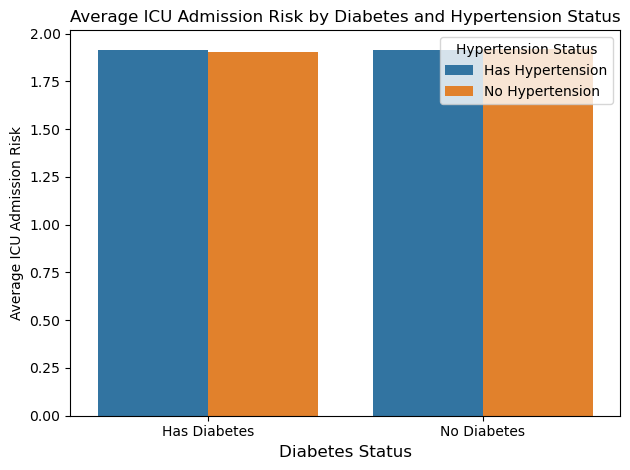

In [28]:
# Map Diabetes labels (1 = Yes, 2 = No)
df_cleaned['DIABETES_LABEL'] = df_cleaned['DIABETES'].map({2: 'No Diabetes', 1: 'Has Diabetes'})

# Map Hypertension labels (1 = Yes, 2 = No)
df_cleaned['HIPERTENSION_LABEL'] = df_cleaned['HIPERTENSION'].map({2: 'No Hypertension', 1: 'Has Hypertension'})

# Group data to calculate the average ICU risk for each combination of Diabetes and Hypertension
grouped_data = df_cleaned.groupby(['DIABETES_LABEL', 'HIPERTENSION_LABEL'])['ICU'].mean().reset_index()

# Create grouped bar chart
sns.barplot(data=grouped_data, x='DIABETES_LABEL', y='ICU', hue='HIPERTENSION_LABEL')

# Add labels, title, and grid
plt.title("Average ICU Admission Risk by Diabetes and Hypertension Status")
plt.xlabel("Diabetes Status", fontsize=12)
plt.ylabel("Average ICU Admission Risk")
plt.legend(title="Hypertension Status")
plt.tight_layout()

# Show the plot
plt.show()

#### ICU risk based on Age and Sex

/tmp/ipykernel_184147/829289738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SEX_LABEL'] = df_cleaned['SEX'].map({2: 'Male', 1: 'Female'})
/tmp/ipykernel_184147/829289738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_184147/829289738.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

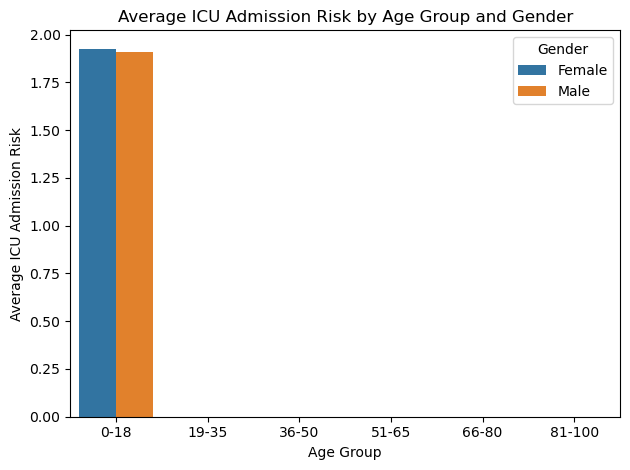

In [29]:
 # Map gender labels (2 = Male, 1 = Female)
df_cleaned['SEX_LABEL'] = df_cleaned['SEX'].map({2: 'Male', 1: 'Female'})

# Create age bins to group data into age ranges
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100']
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=False)

# Group data to calculate mean ICU risk by gender and age group
grouped_data = df_cleaned.groupby(['AGE_GROUP', 'SEX_LABEL'])['ICU'].mean().reset_index()

# Create grouped bar chart
sns.barplot(data=grouped_data, x='AGE_GROUP', y='ICU', hue='SEX_LABEL')

# Add labels, title, and grid
plt.title("Average ICU Admission Risk by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average ICU Admission Risk")
plt.legend(title="Gender")
plt.tight_layout()

# Show the plot
plt.show()

# Model Building

## Feature selection

In [30]:
#selecting only numeric features and storing resulting datarame as a copy
df_num = df_cleaned.select_dtypes(include=[np.number]).copy()

#creating a list of feature columns
feature_cols = []
for col in df_num.columns:
    #excluding AGE and target
    if col != 'AGE' and col != 'ICU':
        feature_cols.append(col)

x = df_num[feature_cols] #features
y = df_num['ICU'] #target variable

In [31]:
#using RFE to select top 5 features - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
estimator = LogisticRegression()  # Use default max_iter (100)
selector = RFE(estimator, n_features_to_select=5) 
selector = selector.fit(x, y)

selected_features = x.columns[selector.support_] #selector.support_ is a boolean mask indicating selected features
print("Selected features via RFE:", selected_features)

Selected features via RFE: Index(['INTUBED', 'PNEUMONIA', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC'], dtype='object')


## Logistic Regression

In [32]:
X = df_cleaned[selected_features]
Y = df_cleaned['ICU'] #target variable#Initialize and fit Logistic Regression model  

In [33]:
clf = LogisticRegression(random_state=2)
clf.fit(X, Y)

LogisticRegression(random_state=2)

In [34]:
#Evaluation
print("Accuracy", clf.score(X, Y)) 
print("Intercept:", clf.intercept_) 
print("Coefficients:") #larger coefficients indicate a stronger impact on the model's decision

#Display feature importance
for feat, coef in zip(selected_features, clf.coef_[0]): 
    print(f"{feat:>20}: {coef}") #print relevant information

Accuracy 0.9164275642037751
Intercept: [-2.5046601]
Coefficients:
             INTUBED: 1.9025319982494036
           PNEUMONIA: 1.1106528821180006
      CARDIOVASCULAR: 0.1559655460014761
             OBESITY: 0.22810201208443032
       RENAL_CHRONIC: -0.20792519887612065


## Splitting the data

In [35]:
#splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Logistic Regression on training data

In [36]:
clf_split = LogisticRegression(max_iter=1000, random_state=2) 
clf_split.fit(X_train, Y_train)  #training the model on training data 

LogisticRegression(max_iter=1000, random_state=2)

#### Model Evaluation

In [37]:
train_score = clf_split.score(X_train, Y_train)
test_score = clf_split.score(X_test, Y_test)

print("Training accuracy:", train_score) 
print("Test accuracy:", test_score)

Training accuracy: 0.9165090037975201
Test accuracy: 0.9161018102626922


In [38]:
#predictions on the test set 
Y_pred = clf_split.predict(X_test) 

#Confusion matrix
print("Confusion Matrix:") 
print(confusion_matrix(Y_test, Y_pred)) 

#Classification report
print("Classification Report:") 
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[    0  3082]
 [    0 33653]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3082
         2.0       0.92      1.00      0.96     33653

    accuracy                           0.92     36735
   macro avg       0.46      0.50      0.48     36735
weighted avg       0.84      0.92      0.88     36735



/home/hf180/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hf180/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hf180/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Cross-validation

In [39]:
#10-fold cross-validation
clf_cv = LogisticRegression(max_iter=1000, solver='saga')
cv_scores = cross_val_score(clf_cv, X, Y, cv=10, scoring='accuracy')

print("Cross-validation scores for each fold:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("Standard Deviation of Scores:", cv_scores.std())

Cross-validation scores for each fold: [0.91643075 0.91643075 0.91643075 0.9164262  0.9164262  0.9164262
 0.9164262  0.9164262  0.9164262  0.9164262 ]
Mean Cross-validation Score: 0.9164275641517537
Standard Deviation of Scores: 2.0850569929329496e-06


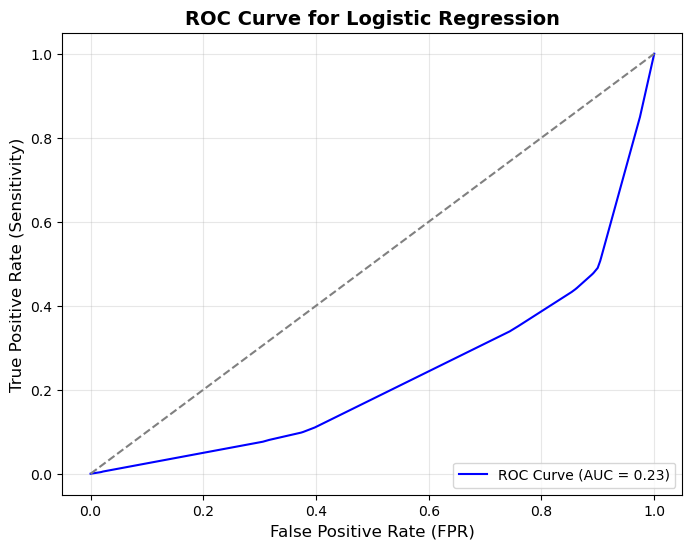

AUC Score: 0.23


In [40]:
#ROC curve
# Define a function to plot the ROC curve and compute AUC
def gen_roc_curve(clf, testX, testY):
    prob = clf.predict_proba(testX)[:, 1]  # Get probability of class 1
    fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=1)  # Compute ROC values

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, sensitivity, label=f"ROC Curve (AUC = {auc(fpr, sensitivity):.2f})", color="blue")
    plt.plot([0, 1], [0, 1], linestyle='--', color="grey")  # Random guess line
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (Sensitivity)", fontsize=12)
    plt.title("ROC Curve for Logistic Regression", fontsize=14, fontweight="bold")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    # Print AUC Score
    print(f"AUC Score: {auc(fpr, sensitivity):.2f}")

# Call the function
gen_roc_curve(clf_split, X_train, Y_train)

In [41]:
#confusion matrices
#defining a function to classify based on probability threshold
def classify_for_threshold(clf, testX, testY, t): 
    prob_df = pd.DataFrame(clf.predict_proba(testX)[:, 1])  # Get probability of class 1
    prob_df['predict'] = np.where(prob_df[0] >= t, 1, 0)  # Assign label based on threshold
    prob_df['actual'] = testY  # Store actual labels
    return pd.crosstab(prob_df['actual'], prob_df['predict'], rownames=['Actual'], colnames=['Predicted'])  # Return confusion matrix

#defining thresholds to test
thresholds = [0.05, 0.10, 0.20]

#calling function for each threshold
for t in thresholds:
    print(f"\nConfusion Matrix for threshold {t}:")
    print(classify_for_threshold(clf_split, X_test, Y_test, t))


Confusion Matrix for threshold 0.05:
Predicted     1
Actual         
1           214
2          6867

Confusion Matrix for threshold 0.1:
Predicted     1
Actual         
1           214
2          6867

Confusion Matrix for threshold 0.2:
Predicted     1
Actual         
1           214
2          6867


## Balancing the data

### Oversampling

In [42]:
#ensuring all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Replace NaN with 0 or another meaningful value
X_train = X_train.astype(int)  #convert to int

#ensuring target is int
Y_train = Y_train.astype(int)

#using SMOTE for balancing the data - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
smote = SMOTE(random_state=2)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Output the dataset shapes
print(f"Original dataset shape: {X_train.shape}, {Y_train.shape}")
print(f"SMOTE balanced dataset shape: {X_train_smote.shape}, {Y_train_smote.shape}")

Original dataset shape: (146938, 5), (146938,)
SMOTE balanced dataset shape: (269340, 5), (269340,)


#### Balanced data model evaluation

In [43]:
#10-fold cross-validation
clf_cv = LogisticRegression(max_iter=1000, solver='saga')
cv_scores = cross_val_score(clf_cv, X_train_smote, Y_train_smote, cv=10, scoring='accuracy')

print("Cross-validation scores for each fold:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("Standard Deviation of Scores:", cv_scores.std())

Cross-validation scores for each fold: [0.712668   0.70505681 0.70773001 0.70984629 0.70810128 0.71055172
 0.71422737 0.71162843 0.71032895 0.71229673]
Mean Cross-validation Score: 0.7102435583277641
Standard Deviation of Scores: 0.0025681083264160226


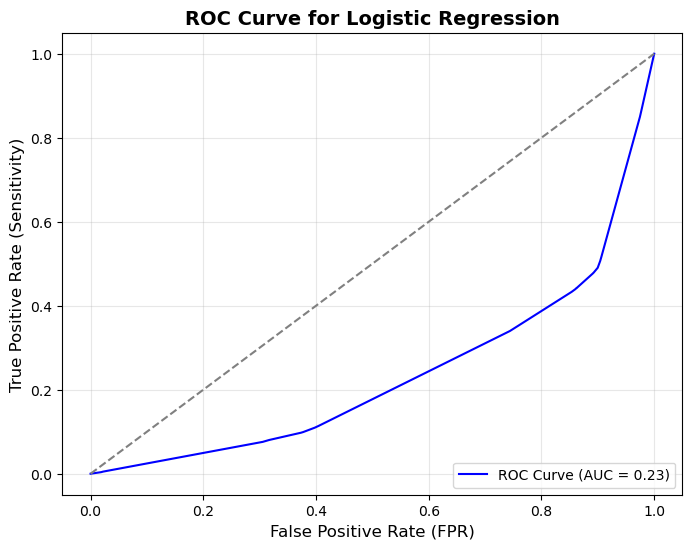

AUC Score: 0.23


In [44]:
#ROC curve
gen_roc_curve(clf_split, X_train_smote, Y_train_smote)

In [45]:
#confusion matrices
thresholds = [0.05, 0.10, 0.20]

#evaluate for each threshold
for t in thresholds:
    print(f"Confusion Matrix for threshold {t}:")
    print(classify_for_threshold(clf_split, X_train_smote, Y_train_smote, t))

Confusion Matrix for threshold 0.05:
Predicted       1
Actual           
1          134670
2          134670
Confusion Matrix for threshold 0.1:
Predicted       1
Actual           
1          134670
2          134670
Confusion Matrix for threshold 0.2:
Predicted       1
Actual           
1          134670
2          134670


# PART 2

In [46]:
import findspark
findspark.init()

from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import col, count, when 

from pyspark.sql.types import StringType, DoubleType, IntegerType, StructType, StructField, ArrayType

from pyspark.ml.feature import VectorAssembler, Imputer, MinMaxScaler, PCA
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import pyspark.sql.functions as F
from pyspark.ml import Pipeline

from pyspark.mllib.evaluation import MulticlassMetrics

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [47]:
#creating a spark session
spark = SparkSession.builder.appName("DataCleaningAndImputation").getOrCreate()
sc = spark.sparkContext

25/04/07 11:13:30 WARN Utils: Your hostname, Bioinftop24-002 resolves to a loopback address: 127.0.1.1; using 192.168.1.89 instead (on interface wlp0s20f3)
25/04/07 11:13:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/07 11:13:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/07 11:13:32 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [48]:
#loading the dataset into a PySpark DataFrame
df = spark.read.csv("/home/hf180/CO7093_Lab/Dataset.csv", header=True, inferSchema=True)
df.show(5)

+-----+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|    2|           1|  2|           2|09/06/2020|      1|        2| 55|       ?|       1|   2|     2|      2|           2|            2|             2|      2|            2|      2|                   3|2.0|
|    5|    2|           1|  1|           2|9999-99-99|      2|        1| 40|       2|       2|   2|     2|      2|           2|            2|           

### Handling missing values

In [49]:
#replace "?" with null values
df_cleaned = df.replace("?", None)

In [50]:
#viewing all null value counts - https://www.aporia.com/resources/how-to/count-nan-values-dataframe/
null_counts_imputed = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns])
null_counts_imputed.show()

+-----+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+----+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL| ICU|
+-----+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+----+
|    0|    0|           0|  0|           0|        0|   7325|     5144|  0|  118792|    1195|1064|  1066|   1280|        1106|         2074|          1143|   1113|         1074|   1126|                   0|7488|
+-----+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+------------

### Imputation

In [ ]:
#code adapted from https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
#identifying numeric columns
numeric_cols = [f.name for f in df_cleaned.schema.fields if isinstance(f.dataType, (DoubleType, IntegerType))]

#changing numeric columns to double for imputation
df_casted = df_cleaned.select(*[col(c).cast("double") if c in numeric_cols else col(c) for c in df_cleaned.columns])

#impute numeric columns using the Imputer
imputer = Imputer(inputCols=numeric_cols, outputCols=[f"{c}_imputed" for c in numeric_cols])
df_imputed = imputer.fit(df_casted).transform(df_casted)

# Impute categorical columns using mode
categorical_cols = [f.name for f in df_cleaned.schema.fields if isinstance(f.dataType, StringType)]

In [52]:
#code afdapted from - https://downloads.apache.org/spark/docs/3.3.2/api/python/reference/api/pyspark.ml.feature.Imputer.html
#compute the mode and impute missing values for each categorical colum
for col_name in categorical_cols:
    mode_value = df_cleaned.groupBy(col_name).count().orderBy("count", ascending=False).first()
    if mode_value:
        #find the mode for the current column
        mode_value = mode_value[0]
        
        #check if mode_value is null
        if mode_value is not None:
            #impute the null value with the mode
            df_imputed = df_imputed.na.fill({col_name: mode_value})
        else:
            print(f"Warning: Mode value for column {col_name} is None. Skipping imputation.")
    else:
        print(f"Warning: No mode value found for column {col_name}. Skipping imputation.")

In [53]:
df_imputed.show(5)

+-----+-----+------------+---+------------+----------+-------+---------+----+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-------------+-------------+--------------------+-----------+--------------------+-----------+----------------------------+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA| AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|index_imputed|USMER_imputed|MEDICAL_UNIT_imputed|SEX_imputed|PATIENT_TYPE_imputed|AGE_imputed|CLASIFFICATION_FINAL_imputed|
+-----+-----+------------+---+------------+----------+-------+---------+----+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-------------+-------------+--------------------+-----------+--------------------+-----------+----------------------

25/04/07 11:13:42 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


#### Preganancy imputation

In [54]:
df_imputed = df_imputed.withColumn(
    "PREGNANT_clean", 
    F.when(F.col("PREGNANT") == "?", None).otherwise(F.col("PREGNANT").cast("int"))
)

In [55]:
df_imputed = df_imputed.withColumn(
    "PREGNANT_imputed", 
    F.when(F.col("PREGNANT_clean").isNull() & (F.col("SEX") == 1), 2)  # Male → not pregnant 
    .when(F.col("PREGNANT_clean").isNull() & (F.col("SEX") == 2), 2)  # Female → assume not pregnant 
    .otherwise(F.col("PREGNANT_clean"))
)

In [56]:
df_imputed.groupBy("SEX", "PREGNANT_imputed").count().show()

+---+----------------+------+
|SEX|PREGNANT_imputed| count|
+---+----------------+------+
|1.0|               2| 79753|
|2.0|               2|118305|
|1.0|               1|  1973|
+---+----------------+------+



In [57]:
df_imputed.show(5)

+-----+-----+------------+---+------------+----------+-------+---------+----+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-------------+-------------+--------------------+-----------+--------------------+-----------+----------------------------+--------------+----------------+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA| AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|index_imputed|USMER_imputed|MEDICAL_UNIT_imputed|SEX_imputed|PATIENT_TYPE_imputed|AGE_imputed|CLASIFFICATION_FINAL_imputed|PREGNANT_clean|PREGNANT_imputed|
+-----+-----+------------+---+------------+----------+-------+---------+----+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-------------+-------------+--------------------+---

In [58]:
null_counts_imputed = df_imputed.select([count(when(col(c).isNull(), c)).alias(c) for c in df_imputed.columns])
null_counts_imputed.show()

+-----+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-------------+-------------+--------------------+-----------+--------------------+-----------+----------------------------+--------------+----------------+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|index_imputed|USMER_imputed|MEDICAL_UNIT_imputed|SEX_imputed|PATIENT_TYPE_imputed|AGE_imputed|CLASIFFICATION_FINAL_imputed|PREGNANT_clean|PREGNANT_imputed|
+-----+-----+------------+---+------------+---------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-------------+-------------+--------------------+---------

#### Changing DataTypes

In [59]:
df_imputed.printSchema()

root
 |-- index: double (nullable = true)
 |-- USMER: double (nullable = true)
 |-- MEDICAL_UNIT: double (nullable = true)
 |-- SEX: double (nullable = true)
 |-- PATIENT_TYPE: double (nullable = true)
 |-- DATE_DIED: string (nullable = false)
 |-- INTUBED: string (nullable = false)
 |-- PNEUMONIA: string (nullable = false)
 |-- AGE: double (nullable = true)
 |-- PREGNANT: string (nullable = true)
 |-- DIABETES: string (nullable = false)
 |-- COPD: string (nullable = false)
 |-- ASTHMA: string (nullable = false)
 |-- INMSUPR: string (nullable = false)
 |-- HIPERTENSION: string (nullable = false)
 |-- OTHER_DISEASE: string (nullable = false)
 |-- CARDIOVASCULAR: string (nullable = false)
 |-- OBESITY: string (nullable = false)
 |-- RENAL_CHRONIC: string (nullable = false)
 |-- TOBACCO: string (nullable = false)
 |-- CLASIFFICATION_FINAL: double (nullable = true)
 |-- ICU: string (nullable = false)
 |-- index_imputed: double (nullable = true)
 |-- USMER_imputed: double (nullable = true)


In [60]:
for column in df.columns:
    df_imputed = df_imputed.withColumn(column, col(column).cast(IntegerType()))

In [61]:
keep_cols = ["index_imputed", "USMER_imputed", "MEDICAL_UNIT_imputed", "SEX_imputed",
             "PATIENT_TYPE_imputed", "AGE_imputed", "CLASIFFICATION_FINAL_imputed",
             "PREGNANT_imputed", "ICU", "PNEUMONIA", "DIABETES", "CARDIOVASCULAR", 
             "RENAL_CHRONIC", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE", 
             "OBESITY", "INTUBED", "TOBACCO" 
]

In [62]:
df_final = df_imputed.select(keep_cols)

In [63]:
df_final.printSchema()

root
 |-- index_imputed: double (nullable = true)
 |-- USMER_imputed: double (nullable = true)
 |-- MEDICAL_UNIT_imputed: double (nullable = true)
 |-- SEX_imputed: double (nullable = true)
 |-- PATIENT_TYPE_imputed: double (nullable = true)
 |-- AGE_imputed: double (nullable = true)
 |-- CLASIFFICATION_FINAL_imputed: double (nullable = true)
 |-- PREGNANT_imputed: integer (nullable = true)
 |-- ICU: integer (nullable = true)
 |-- PNEUMONIA: integer (nullable = true)
 |-- DIABETES: integer (nullable = true)
 |-- CARDIOVASCULAR: integer (nullable = true)
 |-- RENAL_CHRONIC: integer (nullable = true)
 |-- COPD: integer (nullable = true)
 |-- ASTHMA: integer (nullable = true)
 |-- INMSUPR: integer (nullable = true)
 |-- HIPERTENSION: integer (nullable = true)
 |-- OTHER_DISEASE: integer (nullable = true)
 |-- OBESITY: integer (nullable = true)
 |-- INTUBED: integer (nullable = true)
 |-- TOBACCO: integer (nullable = true)



## Validation

In [64]:
#create binary label column
df_final = df_final.withColumn("ICU_binary", when(col("ICU") == 1, 1).otherwise(0))

#assemble feature columns (exclude target + date)
feature_cols = [c for c in df_final.columns if c not in ["ICU", "ICU_binary", "DATE_DIED"]]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_final)

#train/test split
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

#train Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="ICU_binary", maxIter=10)
lr_model = lr.fit(train_data)

#predictions
predictions = lr_model.transform(test_data)

#evaluate
evaluator_auc = BinaryClassificationEvaluator(labelCol="ICU_binary", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)

evaluator_acc = MulticlassClassificationEvaluator(labelCol="ICU_binary", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)

print("AUC: ", auc)
print("Accuracy: ", accuracy)

#show some predictions
predictions.select("ICU_binary", "prediction","probability").show(5)

25/04/07 11:13:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


AUC:  0.8048042248048388
Accuracy:  0.9145689741284587
+----------+----------+--------------------+
|ICU_binary|prediction|         probability|
+----------+----------+--------------------+
|         0|       0.0|[0.98909412153806...|
|         1|       0.0|[0.98638460526722...|
|         0|       0.0|[0.98216627616441...|
|         1|       0.0|[0.87375574632005...|
|         0|       0.0|[0.99111341991987...|
+----------+----------+--------------------+
only showing top 5 rows



In [65]:
df_final.groupBy("ICU_binary").count().show()

+----------+------+
|ICU_binary| count|
+----------+------+
|         1| 16858|
|         0|183173|
+----------+------+



In [66]:
preds_rdd = predictions.select("prediction", "ICU_binary").rdd.map(lambda row: (float(row[0]), float(row[1])))
metrics = MulticlassMetrics(preds_rdd)

print("Precision:", metrics.precision(1.0))
print("Recall:", metrics.recall(1.0))
print("F1 Score:", metrics.fMeasure(1.0))

/home/hf180/miniforge3/lib/python3.12/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Precision: 0.505699481865285
Recall: 0.14219114219114218
F1 Score: 0.22196952467591538


In [67]:
df_final.show(5)

+-------------+-------------+--------------------+-----------+--------------------+-----------+----------------------------+----------------+---+---------+--------+--------------+-------------+----+------+-------+------------+-------------+-------+-------+-------+----------+
|index_imputed|USMER_imputed|MEDICAL_UNIT_imputed|SEX_imputed|PATIENT_TYPE_imputed|AGE_imputed|CLASIFFICATION_FINAL_imputed|PREGNANT_imputed|ICU|PNEUMONIA|DIABETES|CARDIOVASCULAR|RENAL_CHRONIC|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|OBESITY|INTUBED|TOBACCO|ICU_binary|
+-------------+-------------+--------------------+-----------+--------------------+-----------+----------------------------+----------------+---+---------+--------+--------------+-------------+----+------+-------+------------+-------------+-------+-------+-------+----------+
|          2.0|          2.0|                 1.0|        2.0|                 2.0|       55.0|                         3.0|               2|  2|        2|       1|        

#### Scaling

In [68]:
#specify the feature columns
feature_cols = [
    "USMER_imputed", "MEDICAL_UNIT_imputed", "SEX_imputed", "PATIENT_TYPE_imputed", 
    "AGE_imputed", "CLASIFFICATION_FINAL_imputed", "PREGNANT_imputed", "PNEUMONIA", 
    "DIABETES", "CARDIOVASCULAR", "RENAL_CHRONIC", "COPD", "ASTHMA", "INMSUPR", 
    "HIPERTENSION", "OTHER_DISEASE", "OBESITY", "INTUBED", "TOBACCO"
]

#assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df_final)

In [69]:
#apply Min-Max Scaling
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_assembled)
df_scaled = scaler_model.transform(df_assembled)

### K-means clustering

##### Elbow-method

In [71]:
assembler = VectorAssembler(inputCols=["scaled_features"], outputCol="features_vector")
df_with_vectors = assembler.transform(df_scaled)

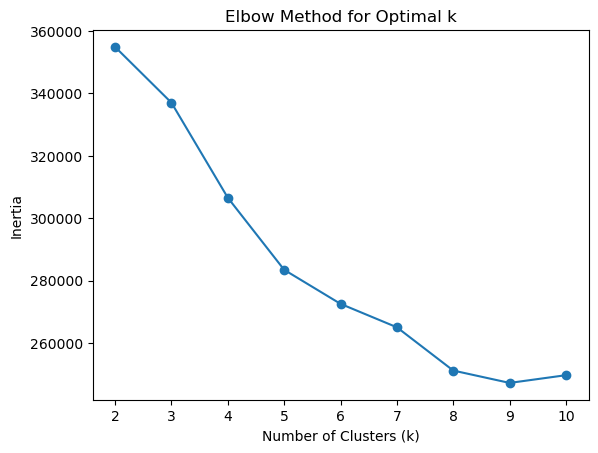

In [72]:
inertia = []

# Test different k values for K-Means (from 2 to 10 clusters)
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(k=k, seed=1, featuresCol="features_vector", predictionCol="prediction")
    kmeans_model = kmeans.fit(df_with_vectors)
    inertia.append(kmeans_model.summary.trainingCost)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [73]:
#apply K-Means Clustering
kmeans = KMeans(k=5, seed=42, featuresCol="features", predictionCol="cluster")
kmeans_model = kmeans.fit(assembled_df)
df_clustered = kmeans_model.transform(assembled_df)

In [74]:
# Evaluate clustering with silhouette score
evaluator = ClusteringEvaluator(featuresCol="features", predictionCol="cluster", metricName="silhouette")
silhouette_score = evaluator.evaluate(df_clustered)
print(f"Silhouette Score: {silhouette_score:.4f}")

Silhouette Score: 0.7933


#### Visualisation

In [75]:
# Show cluster assignments
df_clustered.groupBy("cluster").count().show()

+-------+-----+
|cluster|count|
+-------+-----+
|      1|68238|
|      3|41497|
|      0|55290|
|      4|22638|
|      2|12368|
+-------+-----+



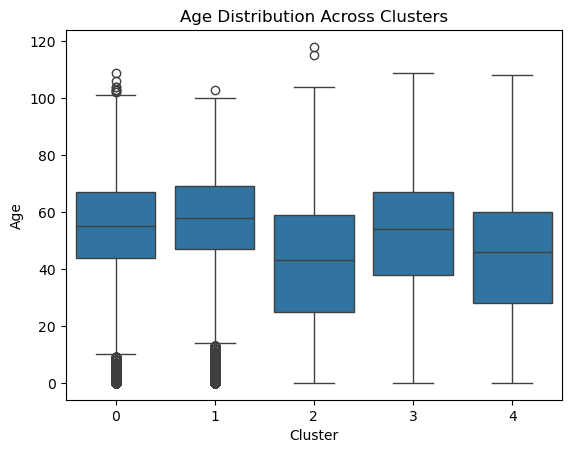

In [76]:
sns.boxplot(x='cluster', y='AGE_imputed', data=df_clustered.toPandas())
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

In [77]:
# Reduce features to 2D for plotting
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(df_clustered)
df_pca = pca_model.transform(df_clustered)

In [78]:
# Convert the PySpark DataFrame to Pandas
df_pca_pd = df_pca.select("pca_features", "cluster").toPandas()

# Extract the PCA coordinates
df_pca_pd["x"] = df_pca_pd["pca_features"].apply(lambda v: v[0])  # First PCA dimension
df_pca_pd["y"] = df_pca_pd["pca_features"].apply(lambda v: v[1])  # Second PCA dimension

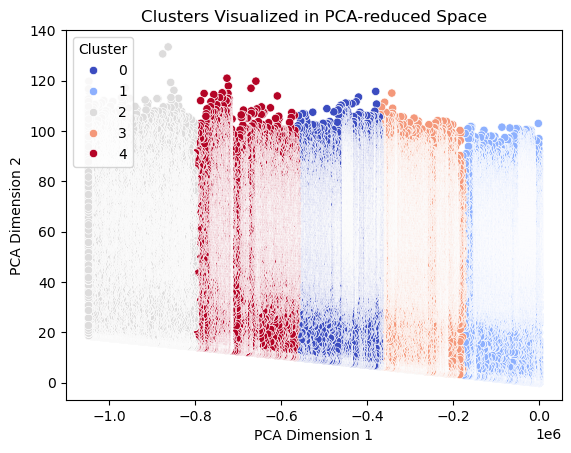

In [82]:
# Scatter plot for PCA dimensions
sns.scatterplot(data=df_pca_pd, x="x", y="y", hue="cluster", palette="coolwarm")
plt.title("Clusters Visualized in PCA-reduced Space")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster")
plt.show()

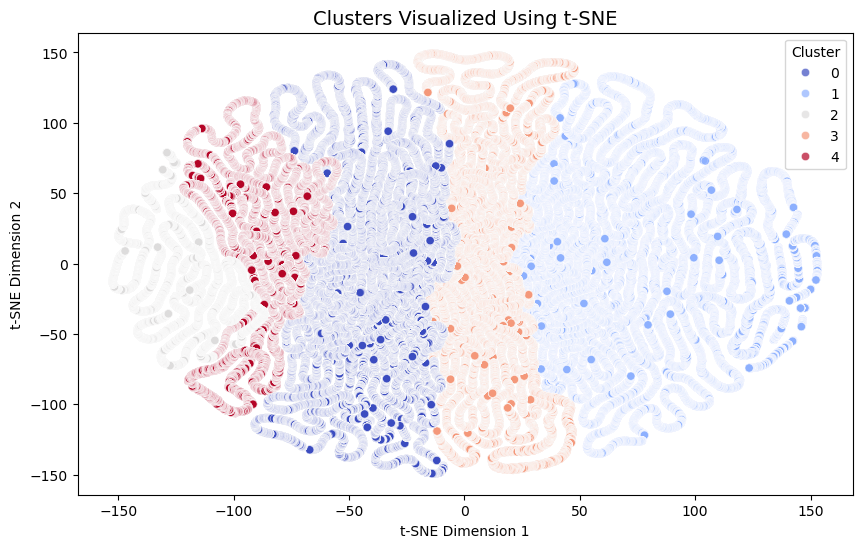

In [83]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_pca_pd[["x", "y"]])
df_pca_pd["tsne_x"] = tsne_results[:, 0]
df_pca_pd["tsne_y"] = tsne_results[:, 1]

# Scatter plot with t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_pd, x="tsne_x", y="tsne_y", hue="cluster", palette="coolwarm", alpha=0.7)
plt.title("Clusters Visualized Using t-SNE", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()


### Local Classifier

In [ ]:
#loop over clusters and train classifier
evaluator = BinaryClassificationEvaluator(labelCol="ICU", rawPredictionCol="rf_rawPrediction", metricName="areaUnderROC")
results = []

for cluster_id in range(3):
    print(f"\nTraining classifier for Cluster {cluster_id}")
    
    # Filter data for cluster
    cluster_data = df_clustered.filter(col("prediction") == cluster_id)

    # Check for presence of both classes
    class_counts = cluster_data.groupBy("ICU").count().collect()
    class_labels = [row["ICU"] for row in class_counts]

    if 0 not in class_labels or 1 not in class_labels:
        print(f"Cluster {cluster_id} skipped: Only one class present")
        continue

    # Balance classes
    class_0 = cluster_data.filter(col("ICU") == 0)
    class_1 = cluster_data.filter(col("ICU") == 1)
    min_count = min(class_0.count(), class_1.count())

    if min_count == 0:
        print(f"Cluster {cluster_id} skipped: No data after balancing")
        continue

    balanced_data = class_0.limit(min_count).union(class_1.limit(min_count))

    # Train/test split
    train_data, test_data = balanced_data.randomSplit([0.8, 0.2], seed=42)

    if train_data.count() == 0 or test_data.count() == 0:
        print(f"Cluster {cluster_id} skipped: Train or test split is empty")
        continue

    # Define classifier
    rf = RandomForestClassifier(
        featuresCol="features",
        labelCol="ICU",
        predictionCol="rf_prediction",
        rawPredictionCol="rf_rawPrediction",
        probabilityCol="rf_probability",
        seed=42
    )

    # Train and evaluate
    model = rf.fit(train_data)
    predictions = model.transform(test_data)
    auc = evaluator.evaluate(predictions)

    print(f"Cluster {cluster_id} AUC: {auc:.4f}")
    results.append((cluster_id, auc))
